In [364]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] ='AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False


In [ ]:
df = pd.read_csv('./proj-yeardream_filtered3.csv')

In [ ]:
df_payment = df[df['유형'] == 'PAYMENT']
df_payment.head()

In [402]:
sales = df_payment.groupby(by='카테고리')['판매가격'].sum()

In [403]:
coupon_dc = df_payment.groupby(by='카테고리')['쿠폰할인액'].sum()

In [ ]:
df_nested = pd.DataFrame({'판매가격': sales, '쿠폰할인액': coupon_dc, '현금지불': sales-coupon_dc,
            '쿠폰비중': coupon_dc/sales, '현금비중': 1-coupon_dc/sales})
df_nested

## 카테고리별 판매가격 -> 쿠폰할인액, 현금지불로 나눔
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

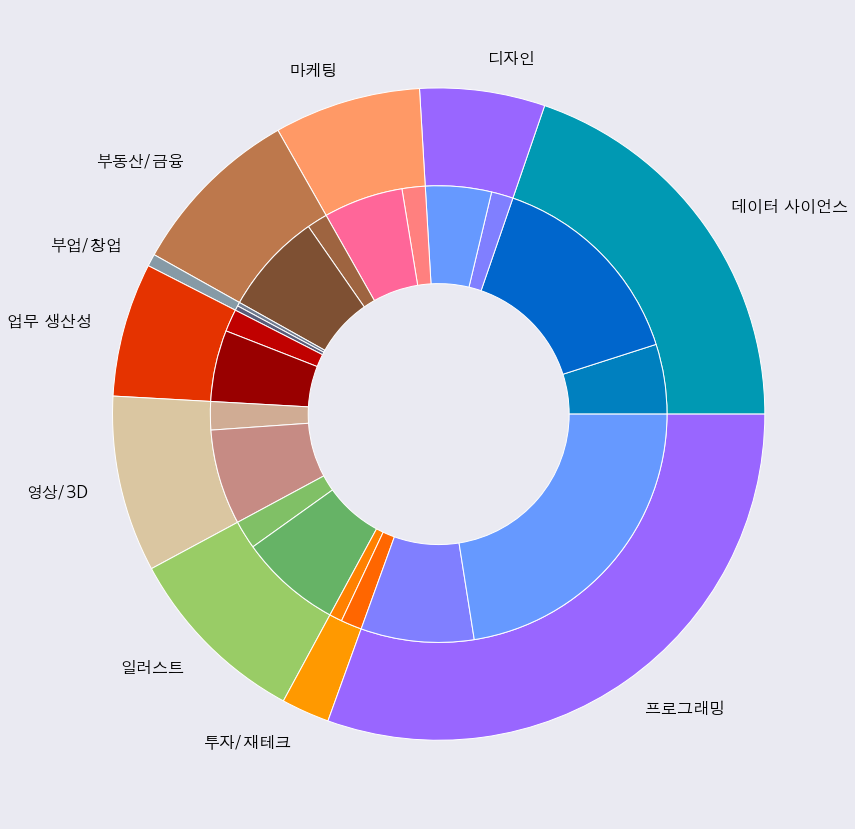

In [494]:

import matplotlib.pyplot as plt

a,b,c,d,e,f,g,h,i,j = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink,
                     plt.cm.summer, plt.cm.autumn, plt.cm.cool]

outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6), g(.6), h(.6), i(.6), j(.6)]
inner_colors = [a(.5), a(.4), 
                b(.5), b(.4),
                c(.5), c(.4),
                d(.5), d(.4),
                e(.5), e(.4),
                f(.5), f(.4),
                g(.5), g(.4),
                h(.5), h(.4),
                i(.5), i(.4),
                j(.5), j(.4),
                ]
    
fig, ax = plt.subplots(figsize=(15,15), facecolor='#eaeaf2')
font_color = '#525252'

# outer circle 설정
ax.pie(df_nested['판매가격'], labels=df_nested.index, radius=1, colors=outer_colors, wedgeprops=dict(width=0.3, edgecolor='w'))

# inner circle 설정
# 쿠폰할인액과 현금지불 데이터를 나란히 배열한 1D 리스트 생성
inner_values = df_nested[['쿠폰할인액', '현금지불']].values.flatten()

ax.pie(inner_values, 
       radius=1-0.3, 
       colors=inner_colors, 
       wedgeprops=dict(width=0.3, edgecolor='w'))

plt.show()

In [377]:
df_payment_coupon = df_payment[df_payment['쿠폰할인액'] > 0]

coupon_count = df_payment_coupon['카테고리'].value_counts()
pay_count = df_payment['카테고리'].value_counts()
pay_count
type(coupon_count)

pandas.core.series.Series

In [ ]:
df_category = pd.DataFrame({'쿠폰사용구매건': coupon_count, '일반구매건': pay_count,
                            '합계': coupon_count+pay_count, '쿠폰비중': coupon_count/pay_count,
                            '일반비중': 1-(coupon_count/pay_count)})
df_category

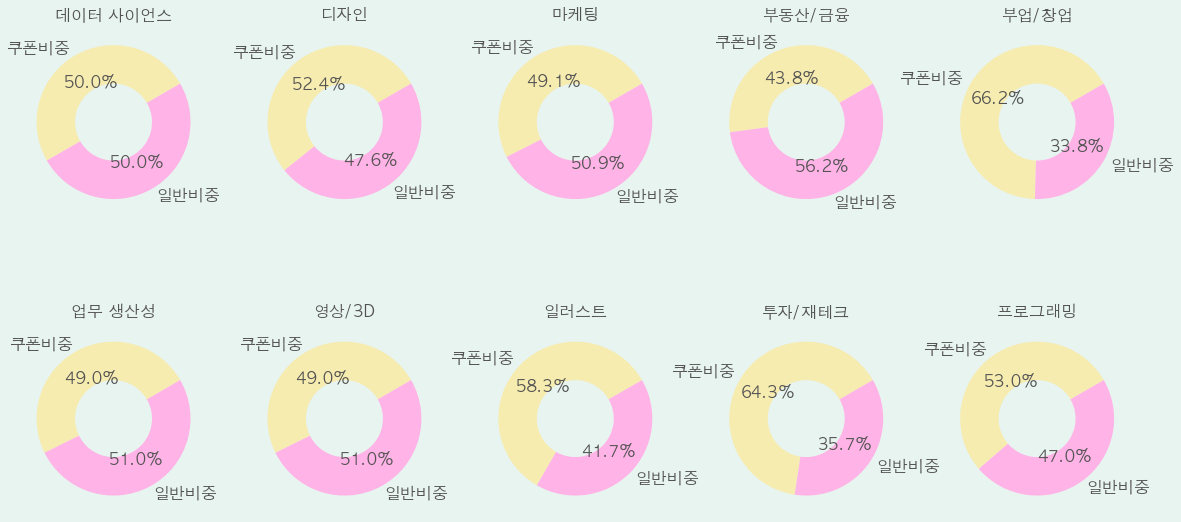

In [386]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
count = 0

fig, axs = plt.subplots(2, 5, figsize=(20, 10), facecolor='#e8f4f0')

for i in range(0,2):
    for j in range(0,5):
        axs[i,j].pie(df_category[['쿠폰비중', '일반비중']].iloc[count],
                    labels=df_category.columns[3:5], autopct='%2.1f%%',
                    colors=colors, startangle=30, wedgeprops=dict(width=.5),
                    textprops={'color':font_color})
        axs[i,j].set_title(df_category.index[count], fontsize=16, color=font_color)
        mpl.rcParams['font.size'] = 16.0
        count += 1

In [382]:
df_category_sum = pd.DataFrame({'쿠폰사용구매건': coupon_count.sum(), '일반구매건': pay_count.sum(),
                            '합계': coupon_count.sum()+pay_count.sum(), '쿠폰비중': coupon_count.sum()/pay_count.sum(),
                            '일반비중': 1-(coupon_count.sum()/pay_count.sum())}, index=['합계'])
df_category_sum

,쿠폰사용구매건,일반구매건,합계,쿠폰비중,일반비중
합계,76357,148009,224366,0.515894,0.484106


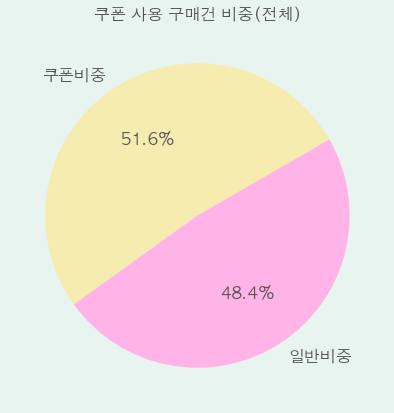

In [384]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']

# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')
ax.pie(df_category_sum[['쿠폰비중', '일반비중']].iloc[0], labels=df_category_sum.columns[3:5], autopct='%2.1f%%', colors=colors, startangle=30, textprops={'color':font_color})
# Set title, its position, and font size
title = plt.title("쿠폰 사용 구매건 비중(전체)", fontsize=16, color=font_color)
# mpl.rcParams['font.size'] = 16.0

## 카테고리별 Treemap
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

In [466]:
import plotly.express as px
fig = px.treemap(df_payment, path=['카테고리', '코스이름'], values='실거래금액')
fig.show()

## 카테고리별 lineplot
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

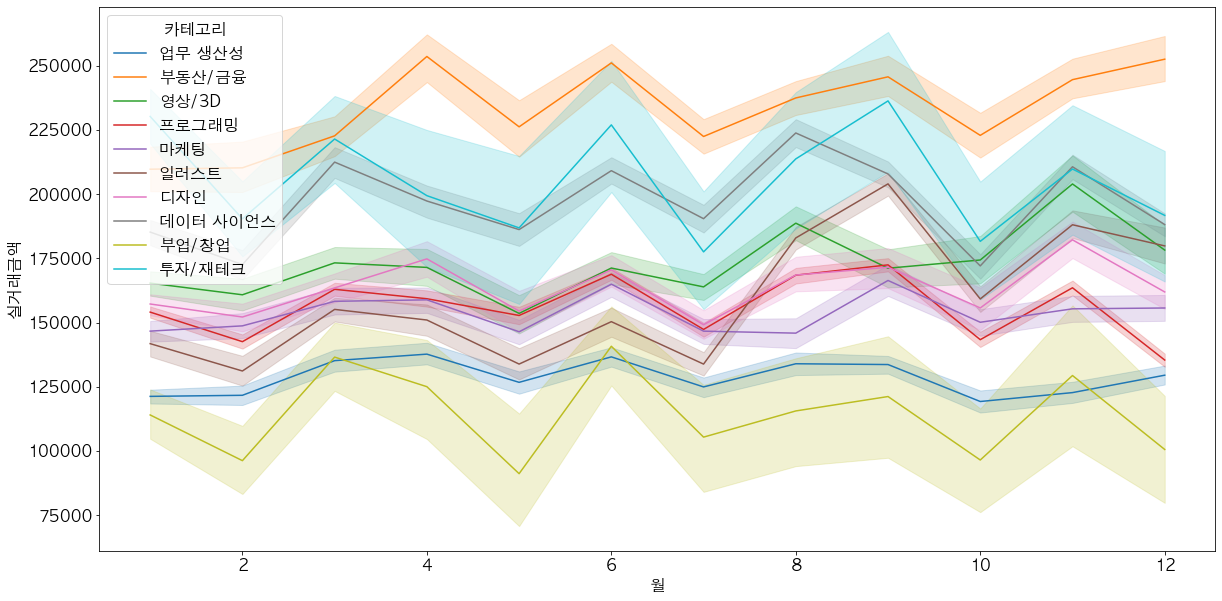

In [472]:
# sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="월", y="실거래금액", hue="카테고리", data=df_payment, ax=ax)

plt.show()

## 카테고리별 heatmap
- Value가 숫자인 항목만 포함

In [ ]:
df_corr = df[['거래ID', '유형', '고객ID', '코스ID', '판매가격', '쿠폰할인액', '실거래금액', '환불금액', '월', '일']]
df_corr

In [ ]:
df_corr = df_corr.corr().round(2)
df_corr

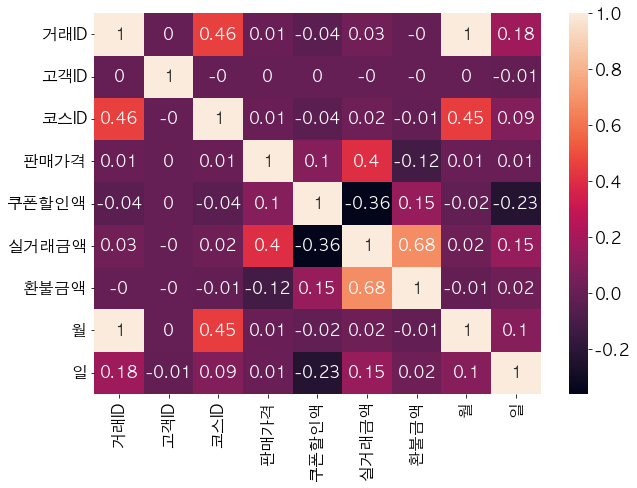

In [478]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.show()